In [1]:
import numpy as np
import os

In [2]:
trace_paths = [os.path.join('./traces',t) for t in os.listdir("traces")]
trace_paths

['./traces/mm_1.bz2',
 './traces/mm_2.bz2',
 './traces/int_2.bz2',
 './traces/int_1.bz2',
 './traces/fp_1.bz2',
 './traces/fp_2.bz2']

In [3]:
def extract_acc(str):
    lines = str.split('\n')
    for line in lines:
        print(line)
        if 'Misprediction Rate' in line:
            acc = line.split('Misprediction Rate:')[-1]
            return 1-float(acc)/100

Processing ./traces/mm_1.bz2 with predictor gshare:13
Branches:           3014850
Incorrect:           203210
Misprediction Rate: 6.74030
Processing ./traces/mm_1.bz2 with predictor tournament:9:10:10
Branches:           3014850
Incorrect:            78633
Misprediction Rate: 2.60819
Processing ./traces/mm_1.bz2 with predictor custom
Branches:           3014850
Incorrect:            70571
Misprediction Rate: 2.34078
Processing ./traces/mm_2.bz2 with predictor gshare:13
Branches:           2563897
Incorrect:           259613
Misprediction Rate: 10.12572
Processing ./traces/mm_2.bz2 with predictor tournament:9:10:10
Branches:           2563897
Incorrect:           217458
Misprediction Rate: 8.48154
Processing ./traces/mm_2.bz2 with predictor custom
Branches:           2563897
Incorrect:           146828
Misprediction Rate: 5.72675
Processing ./traces/int_2.bz2 with predictor gshare:13
Branches:           3755315
Incorrect:            16197
Misprediction Rate: 0.43131
Processing ./traces/

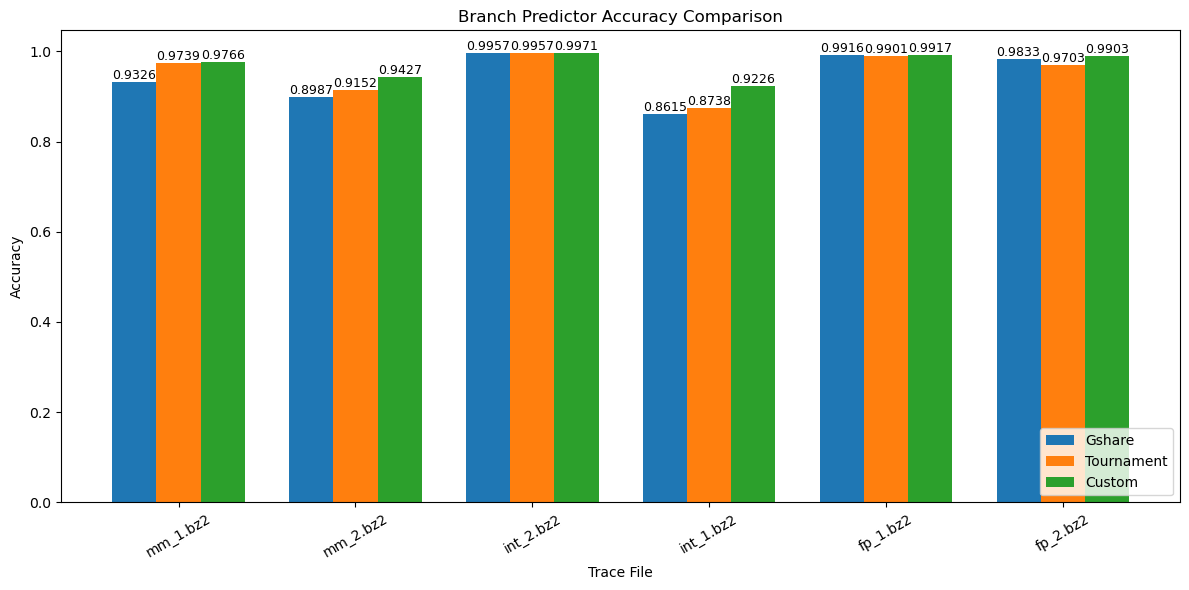

In [6]:
from matplotlib import pyplot as plt
gshare_accs = []
tournament_accs = []
custom_accs = []
types = ['gshare:13', 'tournament:9:10:10', 'custom']
for trace_path in trace_paths:
    for t in types:
        print(f'Processing {trace_path} with predictor {t}')
        out = os.popen(f'bunzip2 -kc {trace_path} | src/predictor --{t}').read()
        if t == 'gshare:13':
            gshare_accs.append(extract_acc(out))
        elif t == 'tournament:9:10:10':
            tournament_accs.append(extract_acc(out))
        elif t == 'custom':
            custom_accs.append(extract_acc(out))
            
trace_names = [os.path.basename(p) for p in trace_paths]
x = np.arange(len(trace_names))  # the label locations
width = 0.25  # the width of the bars

# Only plot bars for predictors that have accuracy data
plt.figure(figsize=(12, 6))
bars = []
labels = []

if gshare_accs:
    bars1 = plt.bar(x - width, gshare_accs, width, label='Gshare')
    bars.append(bars1)
    labels.append('Gshare')
if tournament_accs:
    bars2 = plt.bar(x, tournament_accs, width, label='Tournament')
    bars.append(bars2)
    labels.append('Tournament')
if custom_accs:
    bars3 = plt.bar(x + width, custom_accs, width, label='Custom')
    bars.append(bars3)
    labels.append('Custom')

# Add numbers on top of each bar
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', 
                 ha='center', va='bottom', fontsize=9)

plt.xlabel('Trace File')
plt.ylabel('Accuracy')
plt.title('Branch Predictor Accuracy Comparison')
plt.xticks(x, trace_names, rotation=30)
plt.legend(labels, loc='lower right')
plt.tight_layout()